**MOVIE RECOMMENDATION SYSTEM**
</br>
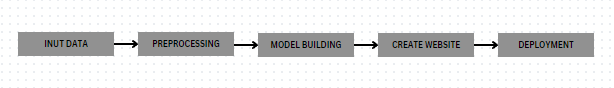

**DATA PREPROCESSING**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
movies = pd.read_csv("tmdb_5000_movies.csv")
credits = pd.read_csv("tmdb_5000_credits.csv")

In [ ]:
# movies.head()
print(movies.columns.tolist())

In [ ]:
# credits.head()
print(credits.columns.tolist())

In [ ]:
# credits.head(1)['cast'].values
# credits.head(1)['crew'].values

In [ ]:
movies = movies.merge(credits,on='title')

In [ ]:
movies.head(1)

In [ ]:
# movies['original_language'].value_counts()
# movies.info()

In [ ]:
# genres, id, keywords, title, overview, cast, crew
movies = movies[['movie_id','title', 'overview','genres', 'keywords', 'cast', 'crew']]

In [ ]:
movies.head()

In [ ]:
movies.isnull().sum() # checking is there any null values

In [ ]:
movies.dropna(inplace=True) # there are three in overview column, usiing this replacing with true

In [ ]:
movies.duplicated().sum() # checking is there any duplicate values in the dataset

In [ ]:
movies.iloc[0].genres

In [ ]:
# [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]
# ['Action', 'Adventure', 'Fantency', 'Scifi'] formating above data
import ast

def convert(obj):
  L = []
  for i in ast.literal_eval(obj):
    L.append(i['name'])
  return L

In [ ]:
movies['genres'] = movies['genres'].apply(convert)

In [ ]:
movies['keywords'] = movies['keywords'].apply(convert)

In [ ]:
def convert_cast(obj):
  L = []
  counter = 0
  for i in ast.literal_eval(obj):
    if counter != 3:
      L.append(i['name'])
      counter+=1
    else:
      break
  return L

In [ ]:
movies['cast'] = movies['cast'].apply(convert_cast)

In [ ]:
def fetch_director(obj):
  L = []
  for i in ast.literal_eval(obj):
    if i['job'] == 'Director':
     L.append(i['name'])
     break
  return L

In [ ]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [ ]:
movies['overview'] = movies['overview'].apply(lambda x:x.split()) # overview is in string for converting to list so that we can concartinate with other lists

In [ ]:
movies.head()

In [ ]:
# removing the space between name like sam worthinton as samworthington for better search
movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies['cast'] = movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['crew'] = movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])

In [ ]:
movies.head()

In [ ]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [ ]:
movies.head()

In [ ]:
new_df = movies[['movie_id', 'title', 'tags']]

In [ ]:
new_df.head()

In [ ]:
new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))

In [ ]:
new_df.head()

In [ ]:
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
def stem(text):
  y = []
  for i in text.split():
    y.append(ps.stem(i))
  return " ".join(y)

In [ ]:
new_df['tags'] = new_df['tags'].apply(stem)

In [ ]:
new_df['tags'][0]

In [ ]:
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

In [ ]:
new_df.head()

**VECTORIZATION**

we are using **BagOfWords** technique for vectorization of tags

converted text to vectors

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')

In [ ]:
vectors = cv.fit_transform(new_df['tags']).toarray()

In [ ]:
vectors[0]

In [ ]:
cv.get_feature_names_out()

using cosine for calculating angle between the vector

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity = cosine_similarity(vectors)

In [ ]:
sorted(list(enumerate(similarity[0])),reverse = True, key = lambda x:x[1])[1:6] # sorting based on angle

**Main function**

In [ ]:
def recommend(movie):
  movies_index = new_df[new_df['title'] == movie].index[0]
  distances = similarity[movies_index]
  movies_list = sorted(list(enumerate(distances)),reverse = True, key = lambda x:x[1])[1:6]

  for i in movies_list:
    print(new_df.iloc[i[0]].title)

In [ ]:
recommend('Avatar')

In [ ]:
recommend('Batman Begins')

In [ ]:
new_df

In [ ]:
import pickle

In [ ]:
pickle.dump(new_df.to_dict(),open('movies_dict.pkl','wb'))

In [ ]:
pickle.dump(similarity,open('similarity.pkl','wb'))